In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to C:\Users\Abdel
[nltk_data]     Alim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
",".join(stopwords.words('english'))


"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [2]:
stop_words = set(stopwords.words('english'))
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
def remove_multiple_spaces(x):
    return " ".join([word for word in str(x).split()])
def preprocessing(data):
    data = data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
    data['CONTENT'] = data['CONTENT'].str.lower()
    data['CONTENT'] = data['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')
    data['CONTENT'] = data['CONTENT'].str.replace(r'[^\w\s]',' ')
    data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_multiple_spaces(x))
    data['CONTENT'] = data['CONTENT'].apply(lambda x : remove_stop(x))
    data = data.drop_duplicates(subset='CONTENT', keep='first')
    x = data['CONTENT']
    y = data['CLASS']
    return(x,y)

In [6]:
#The function returns the best value of K based on the highest mean accuracy of the validation set.
def best_k(X_main, y_main, iter, range_of_neighbors):   
    # Initializing empty lists to store the mean accuracy of the training and validation sets
    accuracy_mean_train = []
    accuracy_mean_valid = []
    # Iterating over the range of neighbors
    for k in range(1, range_of_neighbors):
        # Initializing empty lists to store accuracy for each iteration
        accuracy_K_train= []
        accuracy_K_valid= []
        # Creating the KNeighborsClassifier model with "k" number of neighbors and euclidean distance metric
        modle = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        # Training and evaluating the model for "iter" number of times
        for i in range(iter):
            # Splitting the data into training and validation sets
            X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main ,
                                    test_size = 0.16,
                                    shuffle = True)
            # Fitting the model on the training set
            modle.fit(X_train, y_train)
            # Calculating accuracy on the training set
            accuracy_train = modle.score(X_train,y_train)
            # Calculating accuracy on the validation set
            accuracy_valid = modle.score(X_validat,y_validat)
            # Appending the accuracy scores to their respective lists
            accuracy_K_train.append(accuracy_train)
            accuracy_K_valid.append(accuracy_valid)
            
        # Converting the accuracy lists to numpy arrays
        e = np.array(accuracy_K_train)
        f = np.array(accuracy_K_valid)
        print(k, e.mean(), f.mean())
        # Appending the mean accuracy scores to their respective lists
        accuracy_mean_train.append(e.mean())
        accuracy_mean_valid.append(f.mean())
    # Converting the accuracy lists to numpy arrays
    m = np.array(accuracy_mean_valid)
    # Finding the index of the highest mean accuracy of the validation set
    bestK = np.where(m == m.max())
    n = np.array(accuracy_mean_train)
    # Plotting the accuracy vs K graph
    plt.plot(range(1, range_of_neighbors), m, label = 'validation accuracy', color = 'blue')
    plt.plot(range(1, range_of_neighbors), n, label = 'training accuracy'  , color = 'orange')
    plt.xlabel("kneighbors")
    plt.ylabel("accuracy")
    plt.legend()
    return bestK[0] + 1


MAIN FUNCTION

1 1.0 0.8793181818181818
2 0.8773451327433627 0.7909090909090909
3 0.9401769911504425 0.895909090909091
4 0.8919469026548673 0.8265909090909092
5 0.9161504424778759 0.8788636363636365
6 0.8766371681415929 0.8227272727272726
7 0.9048230088495576 0.8727272727272727
8 0.8673893805309735 0.8304545454545454
9 0.897787610619469 0.8604545454545455
10 0.862787610619469 0.8195454545454547
11 0.8888938053097345 0.8618181818181818
12 0.8628318584070795 0.8181818181818182
13 0.8868141592920356 0.8543181818181818
14 0.8519911504424781 0.8065909090909092
15 0.8728318584070798 0.8495454545454545
16 0.8392035398230088 0.7895454545454547
17 0.8576991150442478 0.8129545454545454
18 0.8222123893805309 0.7731818181818183
19 0.8384070796460176 0.8011363636363636
20 0.7991150442477875 0.7645454545454545
21 0.8250000000000002 0.7909090909090909
22 0.7869026548672567 0.7770454545454545
23 0.8103539823008852 0.7775
24 0.7746017699115043 0.7363636363636364
25 0.7966371681415929 0.764772727272727
26 0.7549999999

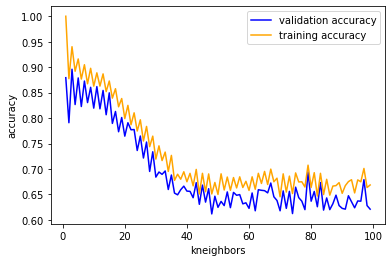

In [4]:
# Read the csv file containing YouTube comments
data = pd.read_csv('Youtube01-Psy.csv')
# Preprocess the data to extract features (x) and target (y) variables
x, y = preprocessing(data)
# Initialize the CountVectorizer object to convert the text data into a numerical representation
vectorizer = CountVectorizer()
# Fit and transform the text data using the CountVectorizer object
featuers = vectorizer.fit_transform(x)
# Set number of iterations and range of number of neighbors to consider
iter = 100
range_of_neighbors = 100
# Split the data into main data (80% for training and validation), and test data (20%)
X_main, X_test, y_main, y_test = train_test_split(featuers,y , test_size = 0.2, shuffle = True)

# Split the main data into train data and validation data so we will get 60% train data, 20% validation data, 20% test data)
X_train, X_validat, y_train, y_validat = train_test_split(X_main,y_main , test_size = 0.16, shuffle = True)

# Find the best value for the number of nearest neighbors (k) using the "best_k" function
a = best_k(X_main,y_main,iter,range_of_neighbors)

# Initialize the K-Nearest Neighbors (KNN) classifier object using the best value for k
modle = KNeighborsClassifier(n_neighbors=int(a), metric='euclidean')

# Fit the KNN model using the training data
modle.fit(X_train, y_train)

# Evaluate the accuracy of the KNN model on the test data
print("accuracy test", modle.score(X_test,y_test))
pred_test = modle.predict(X_test)
print(confusion_matrix(y_test,pred_test))


In [5]:
print(a)

[3]
